# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.utils
from keras.utils.np_utils import to_categorical
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [3]:
#Downloading data from keras dataset(mnist)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
#Printing amount of data we have
#60000 images size 28 by 28 with 60000 labels
#10000 tests with 10000 labels

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize examples

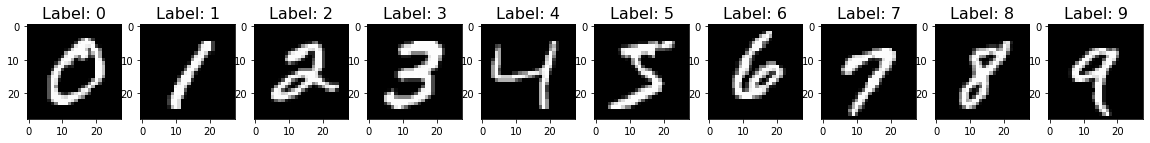

In [5]:
num_classes = 10

#f, ax - figure and axis
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):

  #Showing an image from the dataset
  #From zero to 1 show first image
  sample = x_train[y_train == i][0]

  #In the axis show the image
  #gray cause we are using gray scale values
  ax[i].imshow(sample, cmap='gray')

  #Setting the labels
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
#The labels as a list but random
#Unable to feed our network these values cause they are continuous
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
#Setting the values into a class
#Cause if say the network has to predict a number btwn a 4 or 5 it might say 4.5 and we want accuracy

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [8]:
#We created a vector for each numbers(10)
#Using the label list eg. number 5 we have a 1 at the fifth index
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Preparing data

In [9]:
#Normalizing the data
#Keeping data in certain range

x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
#Reshaping the data
#Settig up the data to stack up and accomodate alot of data from neural network
#, -1 makes it one dimension
#60000 images with one dimension 784

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Creating model - Fully connected Neural Network

In [11]:
#Model where we can keeping creating layers and create chain of layers(stack)
model = Sequential()

#Specifying the dimension of the layers
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))

#25% of our neurals shall be deactivated during the training preventing overfeeding
model.add(Dropout(0.25))

#10 units to output 10 neurals cause we have 10 digits
model.add(Dense(units=10, activation='softmax'))

#categorical entropy, loss used with multiple classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Get summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [12]:
#Importing 512 images at a single time
batch_size = 512

#epochs is the number of iterations performed by the neural network
epochs=10

#Trains the model for a fixed numbr of epochs(iterations)
#Notice the loss goes down while the accuracy goes up
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 4s 12ms/step - loss: 0.5995 - accuracy: 0.8241
Epoch 2/10
118/118 [==============================] - 1s 12ms/step - loss: 0.2225 - accuracy: 0.9351
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1621 - accuracy: 0.9528
Epoch 4/10
118/118 [==============================] - 1s 13ms/step - loss: 0.1281 - accuracy: 0.9629
Epoch 5/10
118/118 [==============================] - 1s 13ms/step - loss: 0.1088 - accuracy: 0.9675
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0901 - accuracy: 0.9734
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0769 - accuracy: 0.9769
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0679 - accuracy: 0.9799
Epoch 9/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0593 - accuracy: 0.9820
Epoch 10/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0529 - accura

# Evaluate

In [13]:
#Checking the performance on that data
#It shows data that the network didnt see as well as the network accuracy

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9777
Test Loss: 0.07210078835487366, Test Accuracy: 0.9776999950408936


In [14]:
#Seeing how the model can be used to predict classification on some dataset
#From the first variable we see the probability from every element froma single class

y_pred = model.predict(x_test)

#The np.argmax goes through every row and returns highest probabilities in terms of index
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred)
print(y_pred_classes)

[[2.7957667e-06 1.3110876e-05 9.8654789e-05 ... 9.9962699e-01
  8.5421398e-06 1.5227023e-05]
 [2.2158437e-07 2.6819273e-04 9.9967170e-01 ... 2.0301202e-08
  1.1601343e-05 1.4747811e-11]
 [8.5668316e-06 9.9827099e-01 2.1598852e-04 ... 5.5485312e-04
  1.5592495e-04 8.1151220e-06]
 ...
 [1.4173751e-09 2.9868637e-08 7.7727658e-11 ... 1.5689581e-06
  6.1082815e-08 6.8210302e-06]
 [1.2434366e-07 1.4530170e-08 2.4926654e-09 ... 1.9430457e-09
  3.5954756e-05 6.6058831e-08]
 [3.3827718e-08 5.4262643e-11 3.9254071e-09 ... 1.4489431e-13
  8.3094047e-09 8.3667329e-10]]
[7 2 1 ... 4 5 6]


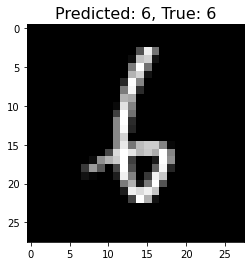

In [15]:

# SINGLE EXAMPLE
#Getting a random element from a tetsting data and making a prediction
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]

#Getting all the predictions and presenting it as an actual number
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

#Ploting the image and the title for the random example that was predicted
plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion matrix

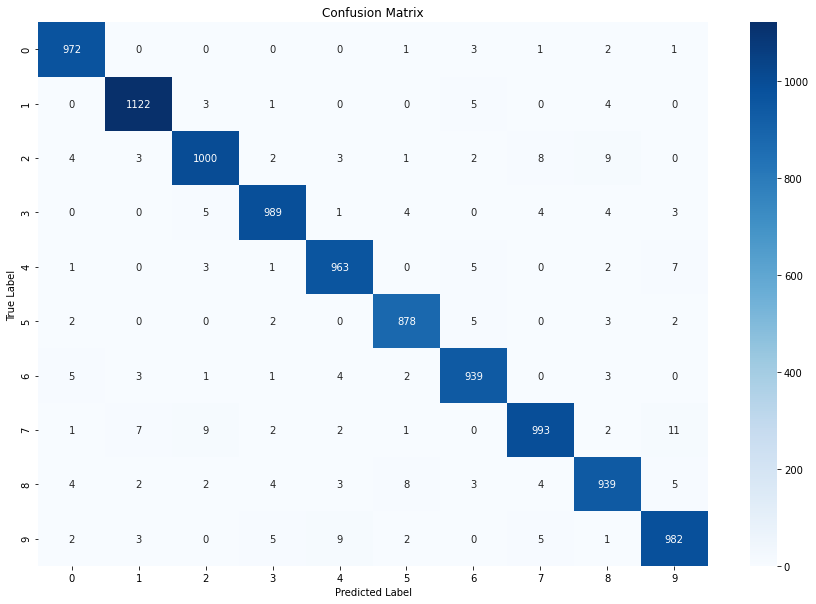

In [16]:
#Shows how accurate the classification of a value is
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Ploting the matrix
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#y axis is the True Label
#x axis is the prediction label

#eg. take zero, for every zero with a zero image, the model predicted 966 zeros accurately
#proceeding on to the right horizontally, 1 zero was predicted as 1, no zeros were predicted as 2 (while confirming down vertically)

# Checking errors

In [17]:
#Checking why the network doenst predict other samples accurately

#Code that finds the predicted classes that are not the same as the true classes
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]

#Created variables to keep the error values
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [18]:
#Finding errors with the maximum probability(algorithim is least certain off the correct prediction)
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of the highest errors
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

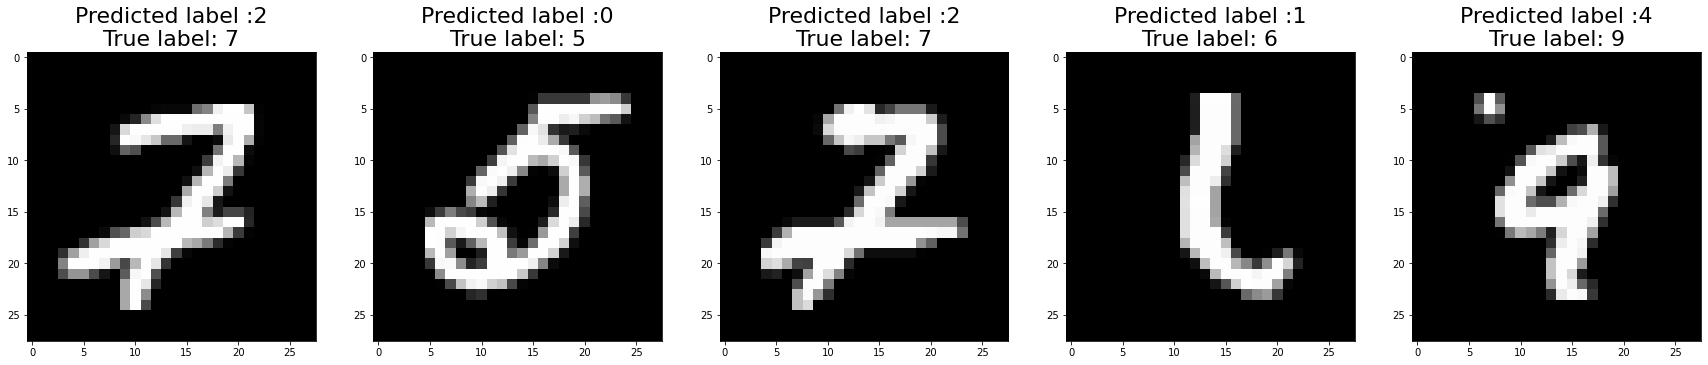

In [18]:
# SHOW TOP ERRORS
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)